<a href="https://colab.research.google.com/github/osamazafar980/Handwriting-Digits-Prediction-Naive-Bayes/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline

# Preparing Dataset


float64 object
(70000, 784) (70000,)


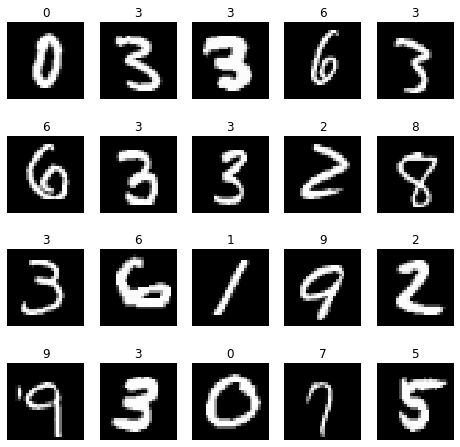

In [20]:
mnist = fetch_openml('mnist_784', version=1)
x = mnist['data']
y = mnist['target']
print(x.dtype, y.dtype)
print(x.shape,y.shape)

#Ploting Data

def plot_images(images , labels):
  n_cols = min(5,len(images))
  n_rows = len(images)//n_cols
  fig = plt.figure(figsize=(8,8))

  for i  in range (n_rows * n_cols):
    sp = fig.add_subplot(n_rows,n_cols,i+1)
    plt.axis("off")
    plt.imshow(images[i], cmap=plt.cm.gray)
    sp.set_title(labels[i])
  plt.show()

p = np.random.permutation(len(x))
p = p[:20]
plot_images(x[p].reshape(-1,28,28),y[p])



In [33]:
y=y.astype("int32")
x = x/255.0

from sklearn.model_selection import train_test_split
tx,tesx,ty,tesy = train_test_split(x,y)
tx.shape,tesx.shape

((52500, 784), (17500, 784))

Training Model

In [43]:
from sklearn.naive_bayes import BernoulliNB

cls = BernoulliNB()
cls.fit(tx,ty)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Evaluation

In [44]:
print(cls.score(tesx,tesy))
from sklearn.metrics import classification_report
pre = cls.predict(tesx)
print(classification_report(tesy,pre))


0.8305714285714285
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1784
           1       0.87      0.95      0.91      1920
           2       0.86      0.82      0.84      1753
           3       0.75      0.80      0.78      1817
           4       0.82      0.80      0.81      1640
           5       0.79      0.69      0.74      1550
           6       0.90      0.90      0.90      1720
           7       0.91      0.84      0.88      1840
           8       0.77      0.76      0.77      1723
           9       0.73      0.82      0.77      1753

    accuracy                           0.83     17500
   macro avg       0.83      0.83      0.83     17500
weighted avg       0.83      0.83      0.83     17500

